# Midterm Assignment - Creative Project

For this part of the assignment, I was curious about investigating the difference in efficency between applying convolutions in the frequency domain and in the spatial domain.

For these experiments, I will convolve an image with a number of Gaussian kernels of different size as usual, then I will apply the same kernels in the frequency domain. I am interested in seeing if there is a discernable difference in the visual quality of the output, as well as the timing of the operations.

## Packages used

- scipy.signal: functions convolve and fftconvolve used to perform convolutions
- numpy: array manipulation
- cv2: used for reading images and converting colours
- matplotlib: used for plotting images

In [ ]:
from scipy import signal
import numpy as np
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Experiments

This function creates a Gaussian kernel of size $n * n$ with $\sigma = 10$.

In [ ]:
def get_gaussian_kernel(n):
    ax = np.linspace(-(n - 1) / 2., (n - 1) / 2., n)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(10))
    return kernel / np.sum(kernel)

Here are the timings for kernels of $n * n$ where $n_{i} = 2^{i} - 1$ for $i = 1 ... 9$. Interestingly, the timings are nearly the same for every value of $n$, with the frequency domain being slightly faster each time, with the exception of $n = 1$ where convolution in the frequency domain is about 10x faster. The difference in timing is much smaller than I had expected.

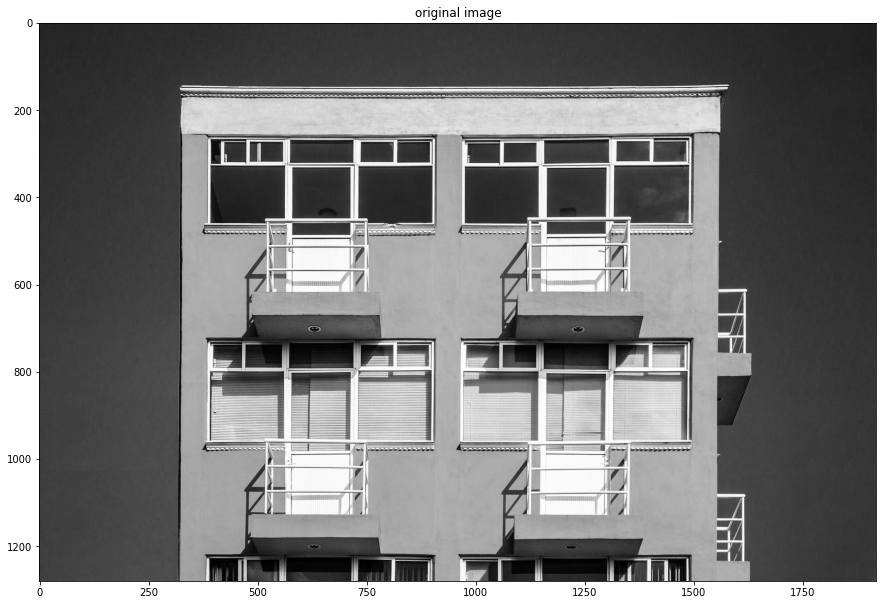

testing Gaussian kernel of size 1*1:
frequency domain:
100 loops, best of 3: 13.8 ms per loop
spatial domain:
10 loops, best of 3: 120 ms per loop

testing Gaussian kernel of size 3*3:
frequency domain:
1 loop, best of 3: 231 ms per loop
spatial domain:
1 loop, best of 3: 243 ms per loop

testing Gaussian kernel of size 7*7:
frequency domain:
1 loop, best of 3: 236 ms per loop
spatial domain:
1 loop, best of 3: 248 ms per loop

testing Gaussian kernel of size 15*15:
frequency domain:
1 loop, best of 3: 241 ms per loop
spatial domain:
1 loop, best of 3: 252 ms per loop

testing Gaussian kernel of size 31*31:
frequency domain:
1 loop, best of 3: 277 ms per loop
spatial domain:
1 loop, best of 3: 289 ms per loop

testing Gaussian kernel of size 63*63:
frequency domain:
1 loop, best of 3: 264 ms per loop
spatial domain:
1 loop, best of 3: 277 ms per loop

testing Gaussian kernel of size 127*127:
frequency domain:
1 loop, best of 3: 255 ms per loop
spatial domain:
1 loop, best of 3: 267 ms 

In [ ]:
img = cv2.imread('/content/drive/My Drive/CV midterm/building.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(15., 15.))
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.show()

output = []

n_range = [1, 3, 7, 15, 31, 63, 127, 255, 511]

for n in n_range:
  print('testing Gaussian kernel of size {}*{}:'.format(n, n))
  kernel = get_gaussian_kernel(n)

  print('frequency domain:')
  %timeit smoothed_fft = signal.fftconvolve(img, kernel, mode='same')
  
  print('spatial domain:')
  %timeit smoothed = signal.convolve(img, kernel, mode='same')
  print('')

  output.append(signal.fftconvolve(img, kernel, mode='same'))
  output.append(signal.convolve(img, kernel, mode='same'))

Here the output images are plotted, with the images convolved in the frequency domain on the left, and those convolved in the spatial domain on the right.

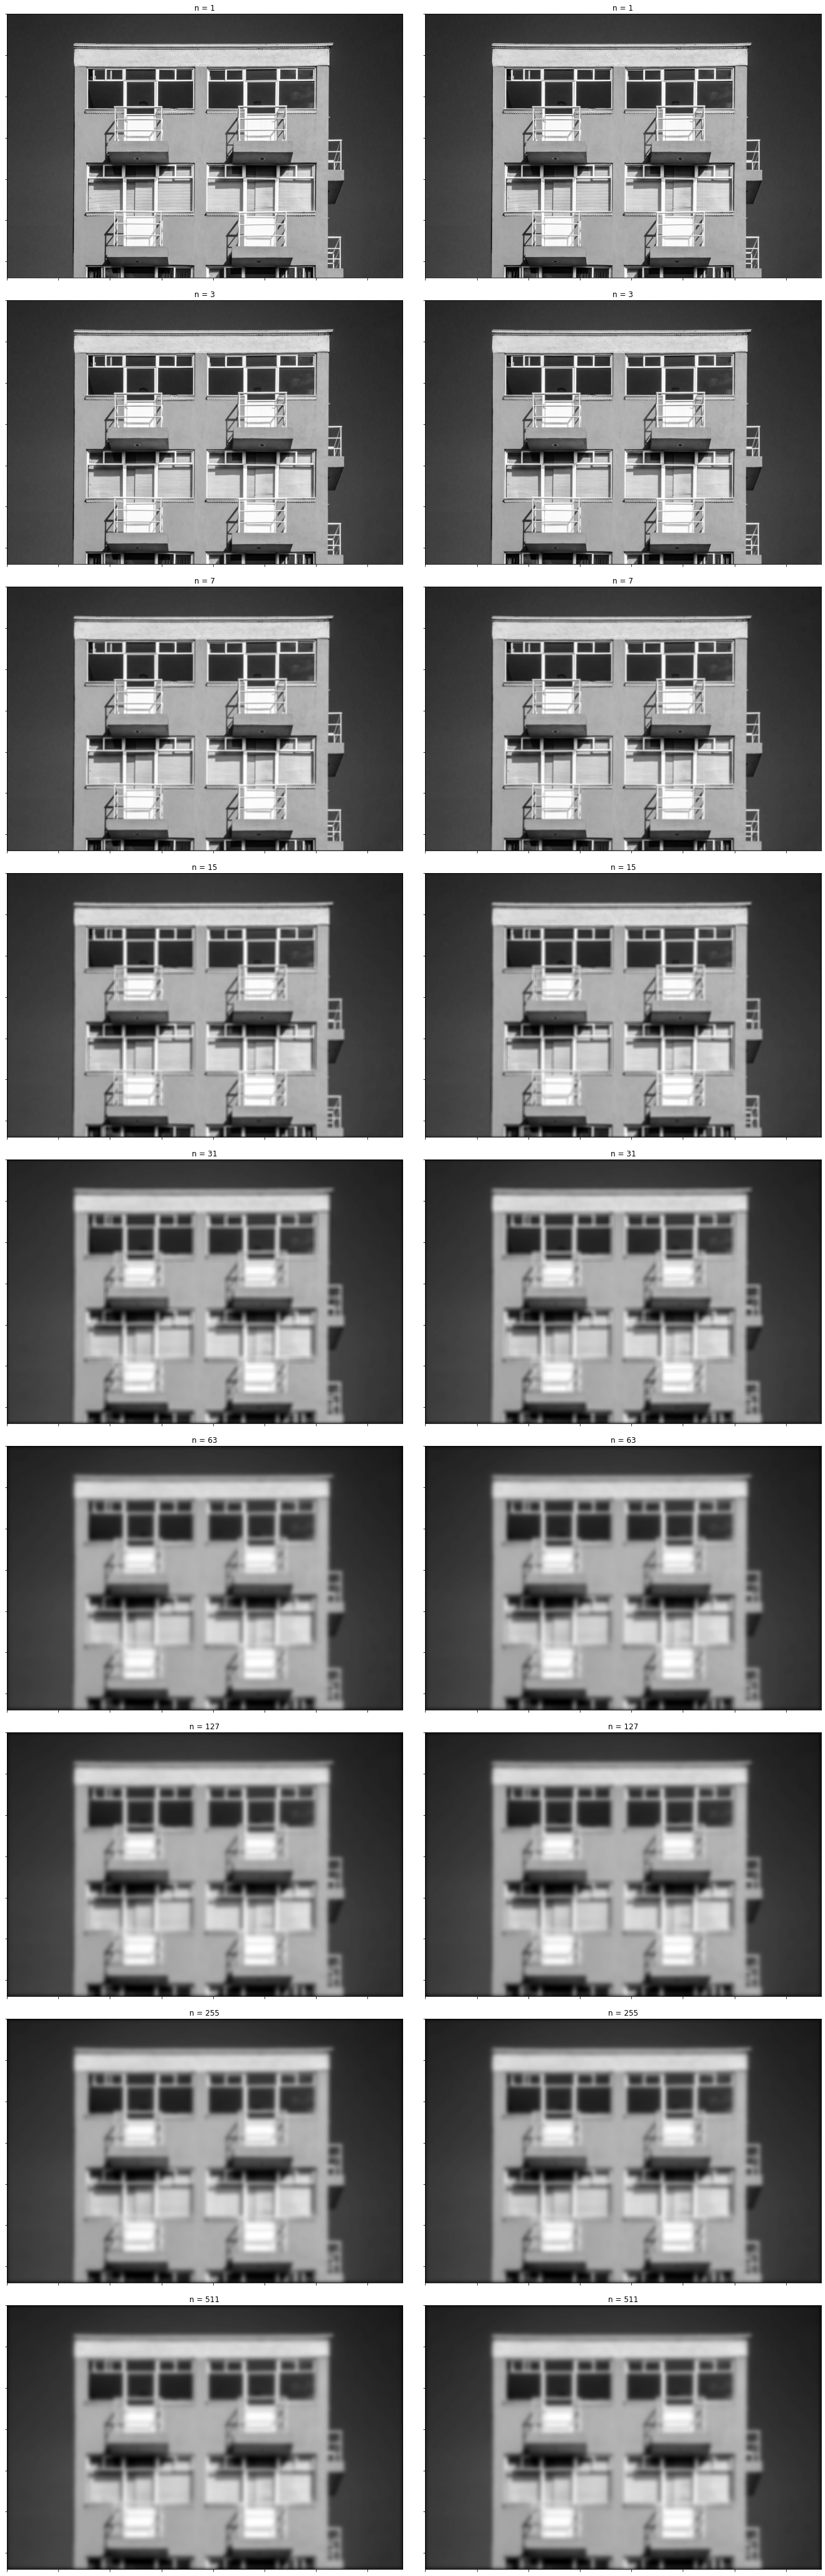

In [ ]:
fig = plt.figure(figsize=(75., 75.))
grid = ImageGrid(fig, 111, nrows_ncols=(9, 2), axes_pad=0.5)
for i, (ax, img) in enumerate(zip(grid, output)):
  ax.axes.xaxis.set_ticklabels([])
  ax.axes.yaxis.set_ticklabels([])
  ax.imshow(img, cmap='gray')
  ax.set_title('n = {}'.format(np.repeat(n_range, 2)[i]))
plt.show()

To my eye there is no difference in output between convolving in the spatial domain vs. the frequency domain. To be sure, the correlation of the histograms of each pair of images can be checked. The correlation is equal to 1 in every case here so the images are in fact identical.

In [ ]:
for i in range(0, len(output), 2):
  hist1 = cv2.calcHist([output[i].astype('float32')], [0], None, [256], [0, 256])
  hist2 = cv2.calcHist([output[i+1].astype('float32')], [0], None, [256], [0, 256])
  correlation = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
  print('n = {}'.format(np.repeat(n_range, 2)[i]))
  print('correlation = {}'.format(correlation))

n = 1
correlation = 1.0
n = 3
correlation = 1.0
n = 7
correlation = 1.0
n = 15
correlation = 1.0
n = 31
correlation = 1.0
n = 63
correlation = 1.0
n = 127
correlation = 1.0
n = 255
correlation = 1.0
n = 511
correlation = 1.0
